<a href="https://colab.research.google.com/github/TitusChoi/AI/blob/master/Concept/CNN/CNN_1(TF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN_1(TF).ipynb
Description   : Convolution Neural Network<br>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

60000 10000


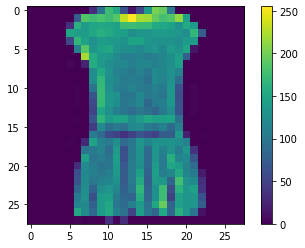

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [3]:
# 이미지 정보 시각화
import matplotlib.pyplot as plt
plt.imshow(train_X[3])
plt.colorbar()
plt.show()
print(train_X[0])

In [4]:
# 데이터 정규화(Normalization)
train_X = train_X / 255.0
test_X = test_X / 255.0
print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [5]:
# keras 활용 훈련
model = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape = (28, 28)),
          tf.keras.layers.Dense(units = 128, activation = 'relu'),
          tf.keras.layers.Dense(units = 10, activation = 'softmax')                             
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(train_X, train_Y,
            epochs = 500,
            validation_split = 0.25,
            callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')]
          )

Epoch 1/500
1407/1407 [==============================] - 4s 2ms/step - loss: 0.6711 - accuracy: 0.7702 - val_loss: 0.4702 - val_accuracy: 0.8319
Epoch 2/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3969 - accuracy: 0.8578 - val_loss: 0.3651 - val_accuracy: 0.8683
Epoch 3/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3462 - accuracy: 0.8751 - val_loss: 0.3566 - val_accuracy: 0.8711
Epoch 4/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3117 - accuracy: 0.8849 - val_loss: 0.3781 - val_accuracy: 0.8616
Epoch 5/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2958 - accuracy: 0.8913 - val_loss: 0.3417 - val_accuracy: 0.8771
Epoch 6/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2895 - accuracy: 0.8936 - val_loss: 0.3336 - val_accuracy: 0.8808
Epoch 7/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2706 - accuracy: 0.9011 - val_loss: 0.3590 - val_ac

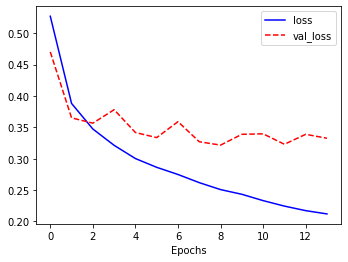

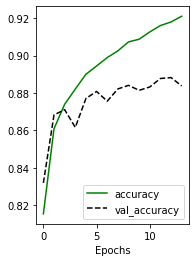

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [8]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8771


[0.3592844009399414, 0.8770999908447266]

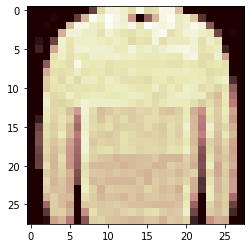

신경망의 예측 확률 분포 
 [[1.0025758 1.0000006 1.9586163 1.        1.0349556 1.        1.0028876
  1.        1.0009642 1.       ]]

 예측 범주 : 2 실제 범주 : 2 -> 일치 여부 True


In [9]:
import numpy as np

# 예측 수정
pred_X = model.predict(test_X[[20]])

# 예측 이미지 확인
plt.imshow(test_X[20], cmap = 'pink')
plt.show()

# 예측 결과 확인
pred_X_argmax = np.argmax(pred_X)
correct = np.equal(pred_X_argmax, test_Y[20])

print('신경망의 예측 확률 분포 \n {}'.format(pred_X + 1))
print('\n 예측 범주 : {} 실제 범주 : {} -> 일치 여부 {}'.format(pred_X_argmax, test_Y[20], correct))